In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

In [ ]:
from scipy.stats import boxcox

In [2]:
cars_data=pd.read_excel('cars_sampled_original.xlsx' )

In [3]:
data = cars_data.copy()

In [4]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-04-07 04:44:00
1,2016-03-07 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-03-07,88045,2016-03-26 13:17:00
2,2016-04-01 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-04-01 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-04-07 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,2016-04-01 23:18:00


In [5]:
data.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
49996,2016-04-03 15:48:00,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,2016-04-03,29690,2016-04-05 15:16:00
49997,2016-03-27 14:55:00,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,2016-03-27,50181,2016-04-07 11:45:00
49998,2016-03-14 18:51:00,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,2016-03-14,86956,2016-03-25 06:17:00
49999,2016-03-15 18:06:00,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,2016-03-15,65232,2016-04-06 17:15:00
50000,2016-03-22 09:54:00,Chevrolet_Matiz_1.Hd_TÃœV11/2017,commercial,offer,1100,test,small car,2006,manual,38,matiz,150000,10,petrol,chevrolet,no,2016-03-22,7973,2016-04-05 21:15:00


In [6]:
# Convert all column names to lowercase
data.columns = data.columns.str.lower()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datecrawled          50001 non-null  datetime64[ns]
 1   name                 49999 non-null  object        
 2   seller               50001 non-null  object        
 3   offertype            50001 non-null  object        
 4   price                50001 non-null  int64         
 5   abtest               50001 non-null  object        
 6   vehicletype          44813 non-null  object        
 7   yearofregistration   50001 non-null  int64         
 8   gearbox              47177 non-null  object        
 9   powerps              50001 non-null  int64         
 10  model                47243 non-null  object        
 11  kilometer            50001 non-null  int64         
 12  monthofregistration  50001 non-null  int64         
 13  fueltype             45498 non-

In [8]:
data.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)   # To show 3 digits after decimal
data.describe()

,datecrawled,price,yearofregistration,powerps,kilometer,monthofregistration,datecreated,postalcode,lastseen
count,50001,50001.000,50001.000,50001.000,50001.000,50001.000,50001,50001.000,50001
mean,2016-03-21 12:48:21.432771328,6559.865,2005.544,116.496,125613.688,5.744,2016-03-20 18:59:35.592487936,50775.217,2016-03-30 02:45:05.291894016
min,2016-03-05 14:06:00,0.000,1000.000,0.000,5000.000,0.000,2015-09-04 00:00:00,1067.000,2016-03-05 14:45:00
25%,2016-03-13 11:43:00,1150.000,1999.000,69.000,125000.000,3.000,2016-03-13 00:00:00,30559.000,2016-03-23 09:46:00
50%,2016-03-21 17:55:00,2950.000,2003.000,105.000,150000.000,6.000,2016-03-21 00:00:00,49504.000,2016-04-03 22:39:00
75%,2016-03-29 14:25:00,7190.000,2008.000,150.000,150000.000,9.000,2016-03-29 00:00:00,71404.000,2016-04-06 10:44:00
max,2016-04-07 14:36:00,12345678.000,9999.000,19312.000,150000.000,12.000,2016-04-07 00:00:00,99998.000,2016-04-07 14:58:00
std,NaN,85818.470,122.992,230.568,40205.234,3.711,NaN,25743.702,NaN


In [10]:
data.shape

(50001, 19)

In [12]:
print(data['seller'].value_counts())
print(data['offertype'].value_counts())
print(data['abtest'].value_counts())

seller
private       49999
commercial        2
Name: count, dtype: int64
offertype
offer      49998
request        3
Name: count, dtype: int64
abtest
test       25869
control    24132
Name: count, dtype: int64


In [13]:
#  groupby operation to check the mean prices for test and control
data.groupby('abtest')['price'].mean()

abtest
control   6311.930
test      6791.153
Name: price, dtype: float64

In [15]:
# Dropping unwanted columns
col=['name','datecrawled','datecreated','postalcode','lastseen','seller','offertype','abtest']
data=data.drop(columns=col, axis=1)       # axis = 1 means operation on columns not rows 

In [16]:
# Removing duplicate records
data.drop_duplicates(keep='first',inplace=True)
#780 duplicate records

In [17]:
data.shape

(49221, 11)

# Data Cleaning

In [18]:
# No. of missing values in each column
data.isnull().sum()

price                     0
vehicletype            5124
yearofregistration        0
gearbox                2728
powerps                   0
model                  2716
kilometer                 0
monthofregistration       0
fueltype               4444
brand                     0
notrepaireddamage      9586
dtype: int64

In [19]:
# Display value counts of 'model' column
print(data['model'].value_counts().sum())

46505


In [20]:
# Display value counts of 'model' column including NaN values
print(data['model'].value_counts(dropna=False).sum())

49221


In [21]:
# Set the display option to show all rows
pd.set_option('display.max_rows', 100)
data['model'].value_counts()

model
golf          3894
others        3416
3er           2755
polo          1753
corsa         1673
              ... 
charade          1
b_max            1
serie_3          1
serie_2          1
rangerover       1
Name: count, Length: 248, dtype: int64

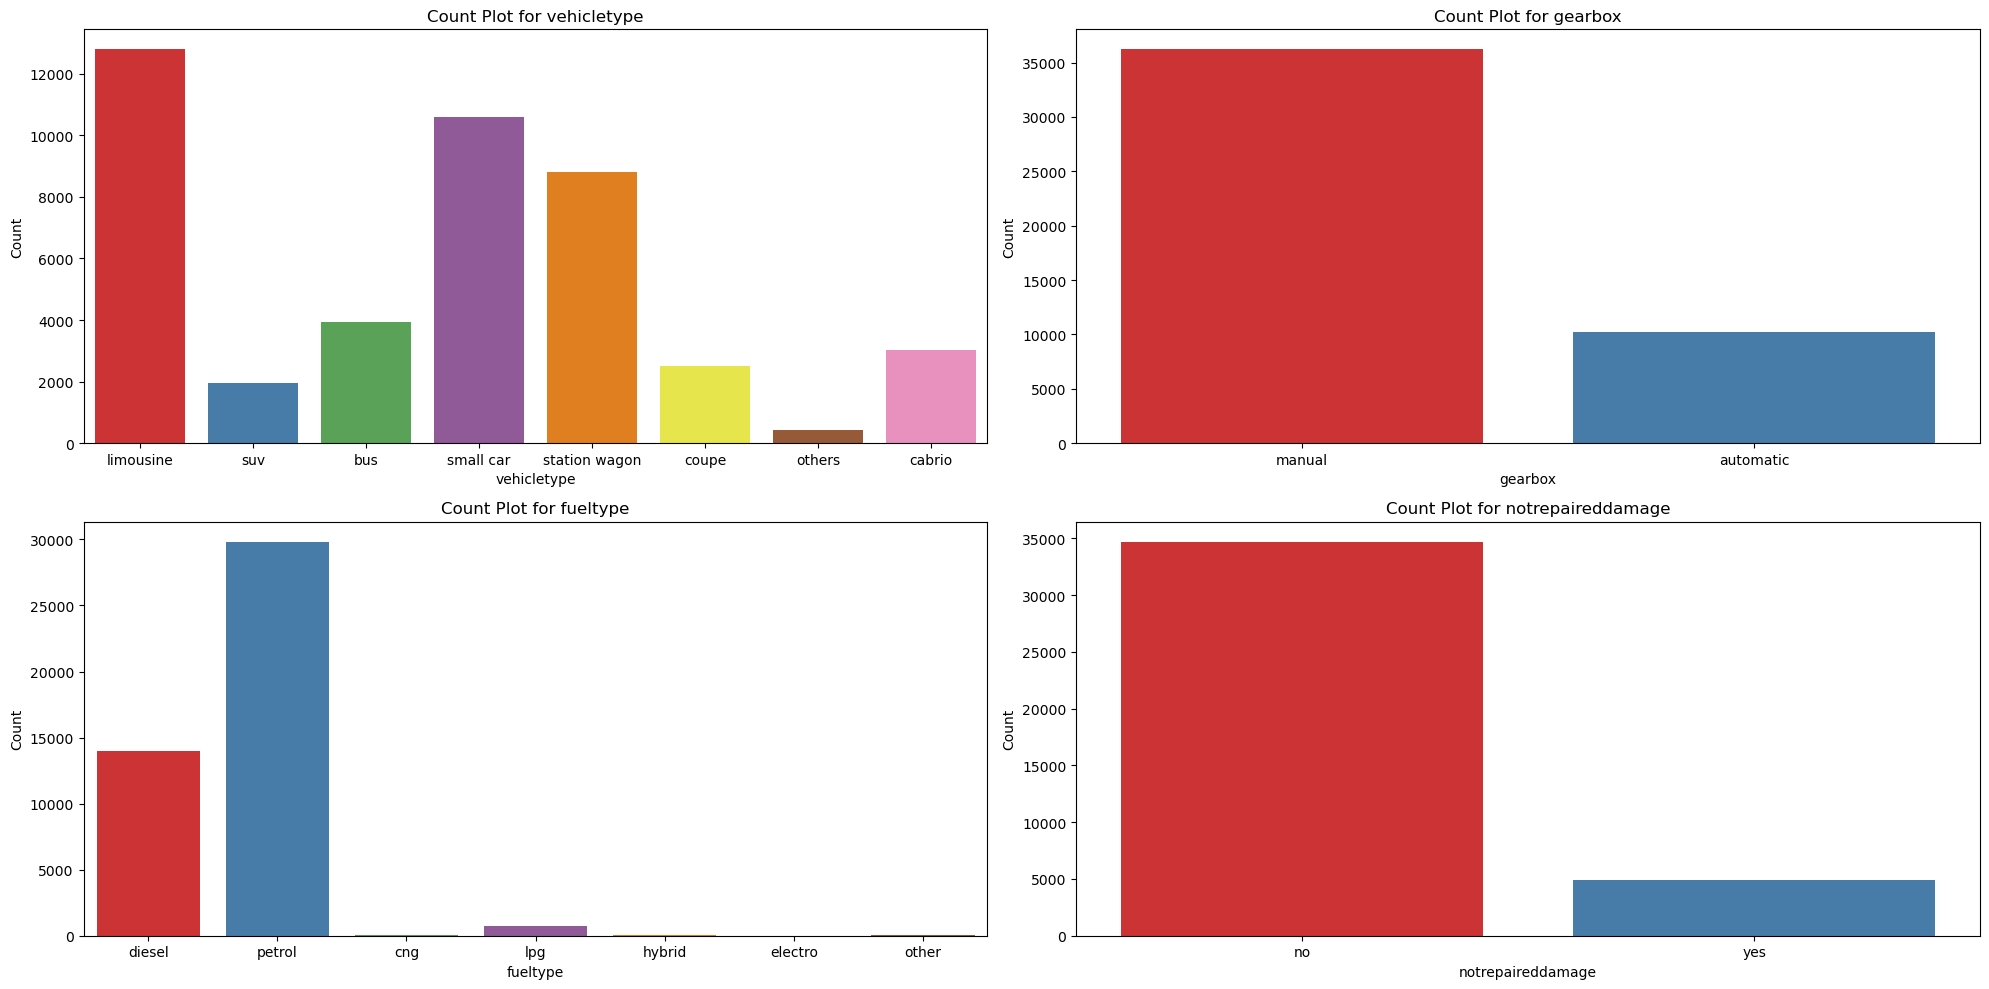

In [22]:
# Iterate through columns in the dataset and create count plots for each feature
columns = ['vehicletype','gearbox','fueltype','notrepaireddamage']

# Create subplots with the calculated rows and columns
fig, axes = plt.subplots(2, 2, figsize=(20, 10))        # ( number of rows , columns ) 2,2 = 4 charts
# Flatten axes to make iteration easier
axes = axes.flatten()

# Plot count plots for each feature
for i, col in enumerate(columns):
    sns.countplot(x=data[col], ax=axes[i], palette='Set1')  # Drop missing values
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')
    
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [23]:
# No. of missing values in each column
data.isnull().sum()

price                     0
vehicletype            5124
yearofregistration        0
gearbox                2728
powerps                   0
model                  2716
kilometer                 0
monthofregistration       0
fueltype               4444
brand                     0
notrepaireddamage      9586
dtype: int64

In [24]:
columns = ['vehicletype', 'gearbox', 'fueltype', 'notrepaireddamage']

# Loop through each column and display its value counts
for col in columns:
    print(f"Value counts for {col}:")
    print(data[col].value_counts(dropna=False))  # Include NaN counts
    print("\n")

Value counts for vehicletype:
vehicletype
limousine        12803
small car        10599
station wagon     8825
NaN               5124
bus               3948
cabrio            3017
coupe             2512
suv               1957
others             436
Name: count, dtype: int64


Value counts for gearbox:
gearbox
manual       36244
automatic    10249
NaN           2728
Name: count, dtype: int64


Value counts for fueltype:
fueltype
petrol     29841
diesel     14011
NaN         4444
lpg          767
cng           79
hybrid        39
other         26
electro       14
Name: count, dtype: int64


Value counts for notrepaireddamage:
notrepaireddamage
no     34730
NaN     9586
yes     4905
Name: count, dtype: int64




# Fill missing values 

In [25]:
# For gearbox
data['gearbox'].fillna(data['gearbox'].mode()[0], inplace=True)

In [26]:
# notrepaireddamage
data['notrepaireddamage'].fillna(data['notrepaireddamage'].mode()[0], inplace=True)

In [27]:
# for fueltype
data['fueltype'].fillna(data['fueltype'].mode()[0], inplace=True)

In [28]:
# for vehicle type
data['vehicletype'].fillna(data['vehicletype'].mode()[0], inplace=True)

In [29]:
# fill model
model_values = data['model'].value_counts().index[:2]  # Top 2 most frequent models
data['model'].fillna(pd.Series(np.random.choice(model_values, len(data['model'].isnull()))), inplace=True)

In [30]:
mode_model = data['model'].mode()[0]
data['model'].fillna(mode_model, inplace=True)

In [31]:
data.isnull().sum()

price                  0
vehicletype            0
yearofregistration     0
gearbox                0
powerps                0
model                  0
kilometer              0
monthofregistration    0
fueltype               0
brand                  0
notrepaireddamage      0
dtype: int64

In [32]:
# Now data is cleaned 

In [33]:
# List of columns to get value counts for
columns = ['price', 'vehicletype', 'yearofregistration', 'gearbox', 'powerps',
           'model', 'kilometer', 'monthofregistration', 'fueltype', 'brand',
           'notrepaireddamage']

# Loop through each column and get value counts
for col in columns:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("\n")

Value counts for price:
price
0         1397
500        735
1500       696
1000       637
2500       584
          ... 
696          1
76000        1
4430         1
103990       1
175000       1
Name: count, Length: 2393, dtype: int64


Value counts for vehicletype:
vehicletype
limousine        17927
small car        10599
station wagon     8825
bus               3948
cabrio            3017
coupe             2512
suv               1957
others             436
Name: count, dtype: int64


Value counts for yearofregistration:
yearofregistration
2000    3249
2005    3072
1999    3006
2001    2765
2003    2709
2006    2641
2004    2580
2002    2538
1998    2415
2007    2337
2008    2172
2009    1993
1997    1947
2010    1630
2011    1525
1996    1397
2017    1373
2016    1349
1995    1258
2012    1229
2013     813
1994     620
2014     617
2018     524
1993     452
1991     408
2015     404
1990     393
1992     391
1989     196
1988     132
1985     110
1987      80
1980      77
1983      5

In [34]:
# 1397 records have price 0    -- Price
# Many values of registration is not make any sense like 3800,2900 and some are too old -- Year of registration
# 5494 records have powerps is 0    --- powerps
# 4966 records have month of registration in the month of 0 this not make any sense --- month of registration

In [35]:
# Price feature

# sns.distplot(data['price'])

#price_count=data['price'].value_counts().sort_index()
#price_count
#sns.boxplot(y=data['price'])
#data['price'].describe()

# Filter the data based on the price condition
filtered_data = data[(data['price'] > 100) & (data['price'] < 150000)]

<Axes: ylabel='price'>

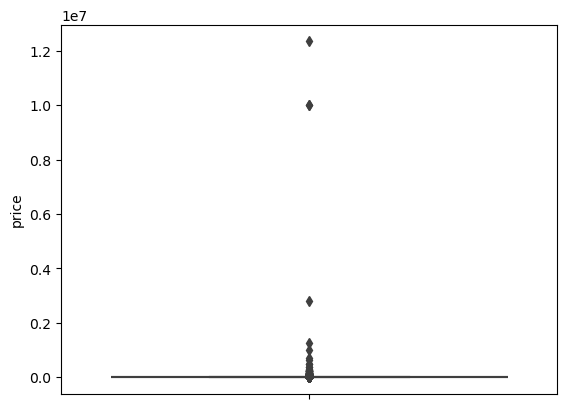

In [36]:
# Before
sns.boxplot(y=data['price'])

<Axes: ylabel='price'>

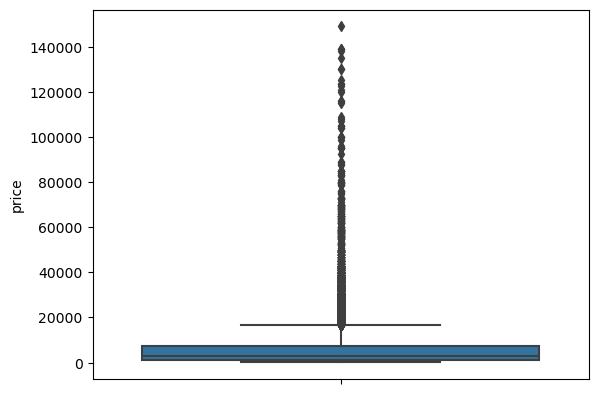

In [37]:
# After 
sns.boxplot(y=filtered_data['price'])

In [38]:
# Count of values where price is less than 100
less_than_100 = data[data['price'] < 100].shape[0]

# Count of values where price is greater than 150000
greater_than_130000 = data[data['price'] > 130000].shape[0]

# Display the counts
print(f"Count of records with price less than 100: {less_than_100}")
print(f"Count of records with price greater than 130000: {greater_than_130000}")

Count of records with price less than 100: 1729
Count of records with price greater than 130000: 39


In [39]:
# for Year of registration          -- working range is 1990 to 2018

#yearwise_count=data['yearofregistration'].value_counts().sort_index()
#print(yearwise_count)

#sum(data['yearofregistration'] > 2018)          # 26 records
#sum(data['yearofregistration'] < 1990)         # 1388 records

In [42]:
# 1397 records have price 0    -- Price
# Many values of registration is not make any sense like 3800,2900 and some are too old -- Year of registration
# 5494 records have powerps is 0    --- powerps
# 4966 records have month of registration in the month of 0 this not make any sense --- month of registration

In [43]:
# for powerps   working range is 10 to 500

#power_count=data['powerps'].value_counts().sort_index()
#power_count
#data['powerps'].describe()
#sum(data['powerps'] < 10)    # 20547 records
#sum(data['powerps'] > 500 )    -- 115 records  

C:\Users\ITFACT\AppData\Local\Temp\ipykernel_5752\975507840.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['powerps'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='powerps', ylabel='Density'>

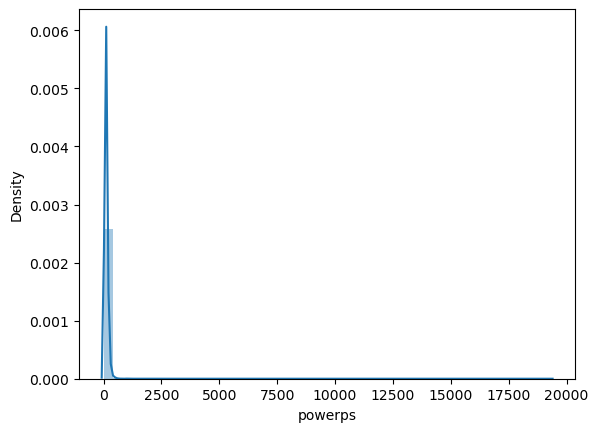

In [297]:
# before
sns.distplot(data['powerps'])

C:\Users\ITFACT\AppData\Local\Temp\ipykernel_5752\1178391439.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data['powerps'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='powerps', ylabel='Density'>

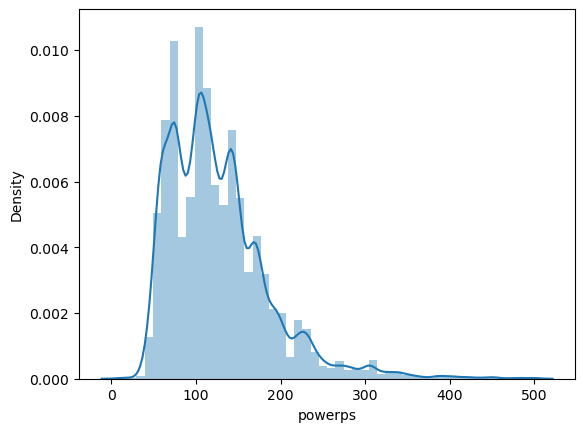

In [298]:
# after 
sns.distplot(filtered_data['powerps'])

<Axes: ylabel='powerps'>

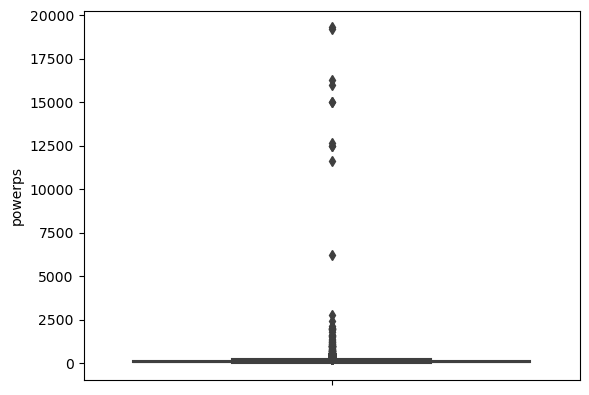

In [299]:
# before
sns.boxplot(y=data['powerps'])

<Axes: ylabel='powerps'>

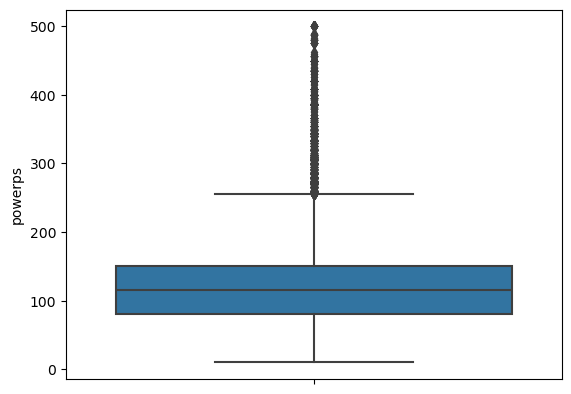

In [300]:
# after
sns.boxplot(y=filtered_data['powerps'])

<Axes: xlabel='powerps', ylabel='price'>

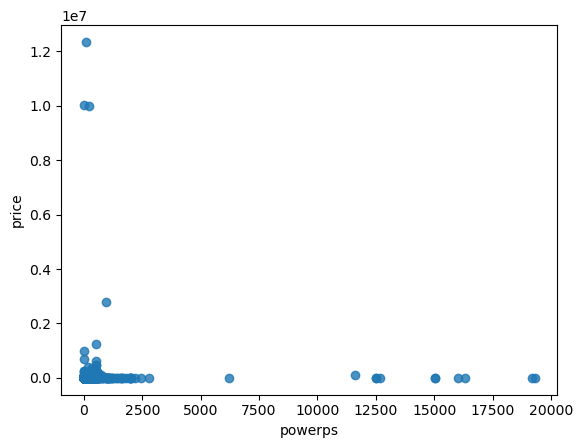

In [301]:
# before
sns.regplot(x='powerps', y='price', scatter=True, fit_reg=False, data=data)

<Axes: xlabel='powerps', ylabel='price'>

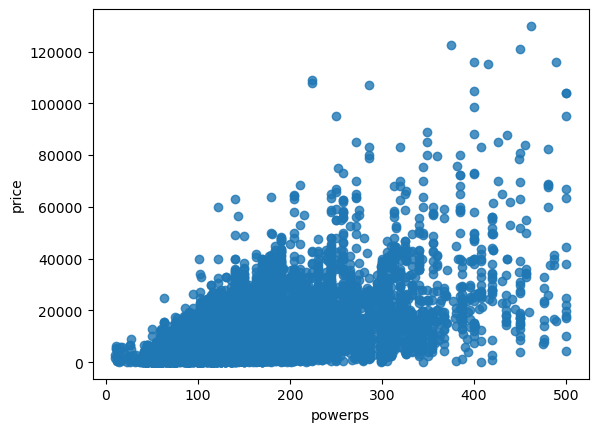

In [302]:
# after
sns.regplot(x='powerps', y='price', scatter=True, fit_reg=False, data=filtered_data)

In [50]:
data.shape

(49221, 11)

In [51]:
# Working range of data
filtered_data = data[
        (data.yearofregistration <= 2018) 
      & (data.yearofregistration >= 1990) 
      & (data.price >= 100) 
      & (data.price <= 130000) 
      & (data.powerps >= 10) 
      & (data.powerps <= 500)]
# 7702 records are dropped

In [52]:
filtered_data.shape

(41519, 11)

In [53]:
# Use .loc to modify the DataFrame directly
filtered_data.loc[:, 'monthofregistration'] /= 12

# Create the 'age' column
filtered_data.loc[:, 'age'] = (2018 - filtered_data['yearofregistration']) + filtered_data['monthofregistration']

# Round the 'age' column to 2 decimal places
filtered_data.loc[:, 'age'] = round(filtered_data['age'], 2)

C:\Users\ITFACT\AppData\Local\Temp\ipykernel_5752\4141344682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'age'] = (2018 - filtered_data['yearofregistration']) + filtered_data['monthofregistration']


In [54]:
filtered_data.head()

,price,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,age
0,4450,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,no,15.250
1,13299,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no,13.500
2,3200,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,no,15.920
3,4500,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no,13.000
4,18750,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no,10.920


In [59]:
# Drop the 'yearofregistration' and 'monthofregistration' columns
filtered_data.drop(columns=['yearofregistration', 'monthofregistration'], inplace=True)  # -- 2 columns removed 

C:\Users\ITFACT\AppData\Local\Temp\ipykernel_5752\970798131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=['yearofregistration', 'monthofregistration'], inplace=True)  # -- 2 columns removed


# EDA

In [57]:
# now EDA + FE + MODEL

In [61]:
filtered_data.head()

,price,vehicletype,gearbox,powerps,model,kilometer,fueltype,brand,notrepaireddamage,age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,no,15.250
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,no,15.920
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920


In [65]:
filtered_data.shape

(41519, 10)

In [63]:
#data.shape   -- (49221, 11)

(49221, 11)

# Univariate analysis

In [70]:
numerical_features   = ['price','powerps', 'kilometer', 'age']
categorical_features = ['vehicletype','gearbox', 'model','fueltype','brand','notrepaireddamage']     

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


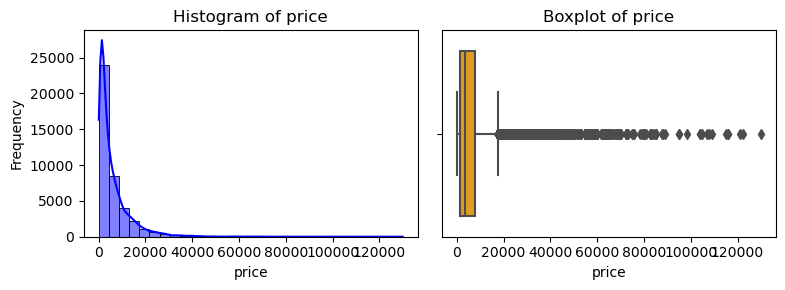

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


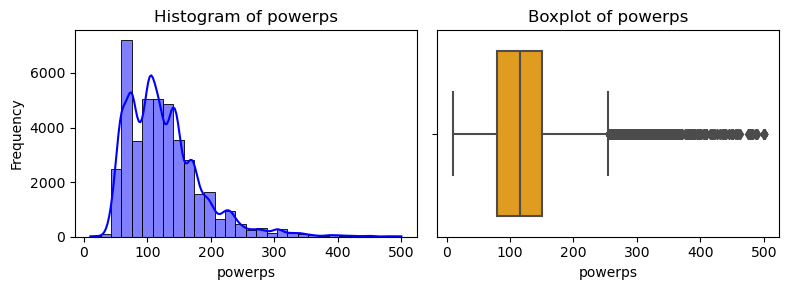

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


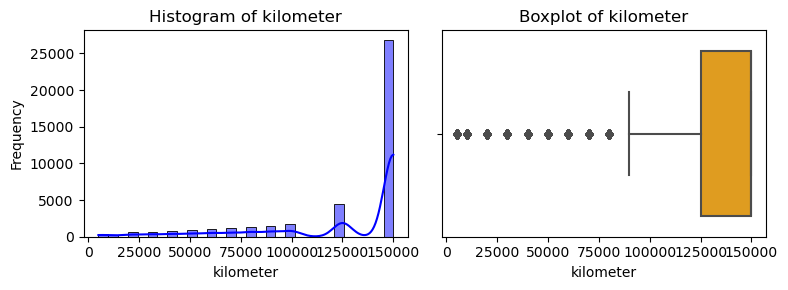

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


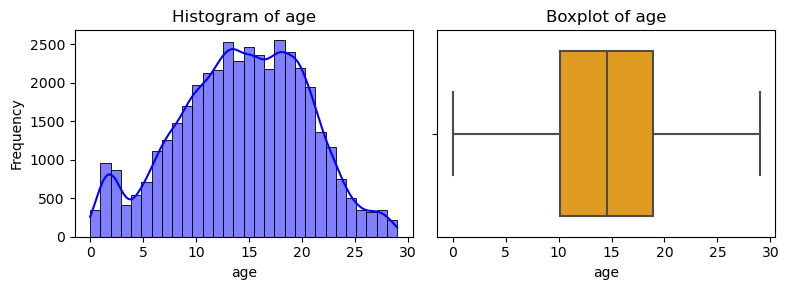

In [73]:
# Loop through numerical features to create histograms and boxplots
for feature in numerical_features:
    plt.figure(figsize=(8,3))   # The first value (10) sets the width, and the second value (4) sets the height of the figure
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=filtered_data, x=feature, kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=filtered_data, x=feature, color='orange')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

In [ ]:
# numerical feature analysis

# price is right skewed
# powerps is nearly skewed
# Kilometer is left skewed
# age is nearly normaly distributed 

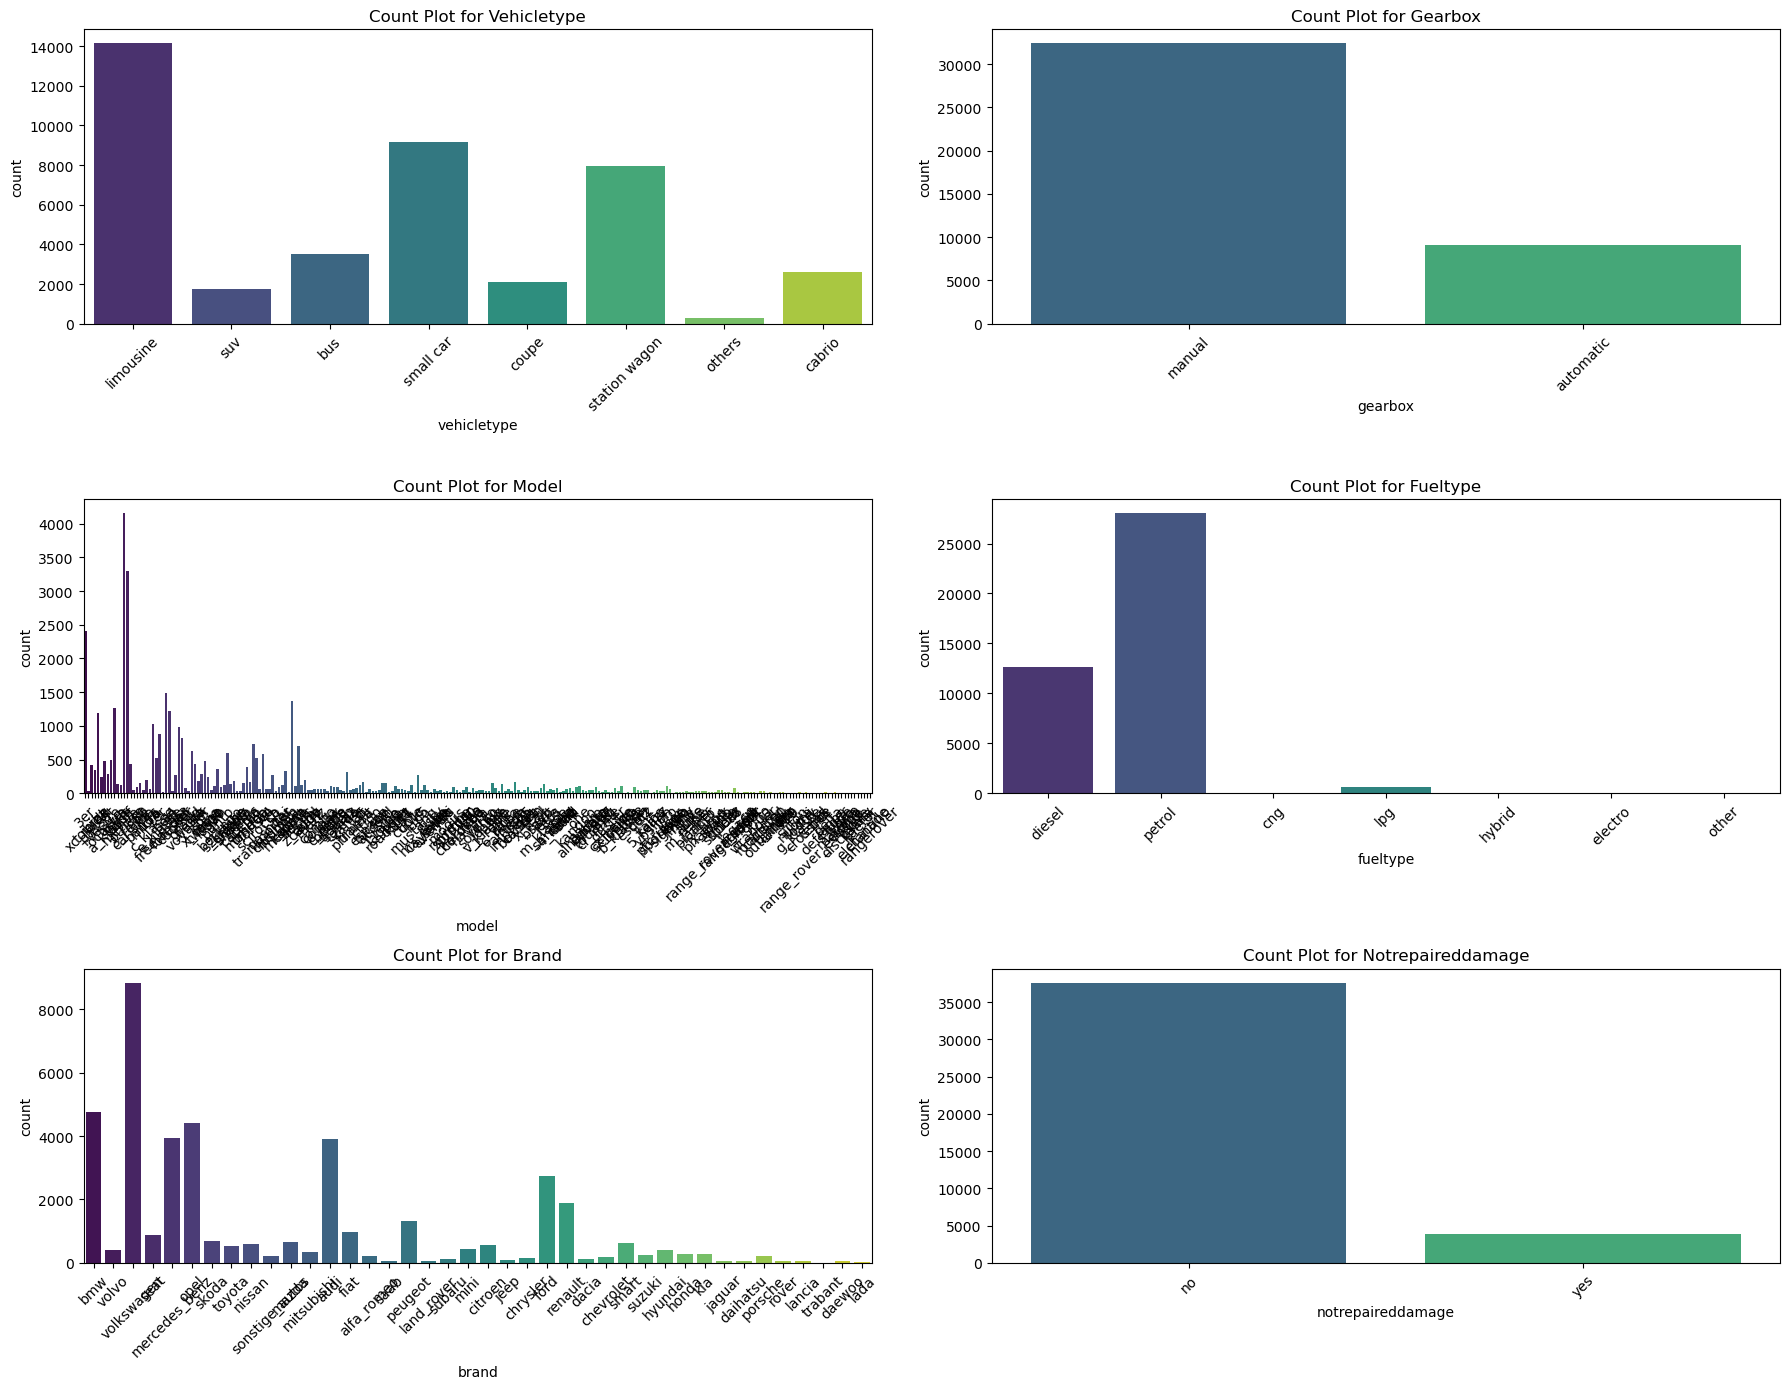

In [79]:
categorical_features = ['vehicletype','gearbox', 'model','fueltype','brand','notrepaireddamage'] 
# Set up the figure size for better readability
plt.figure(figsize=(18,14))

# Loop through the categorical features and plot count plots
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)  # Create a grid of 3 rows and 2 columns
    sns.countplot(data=filtered_data, x=feature, palette="viridis")
    plt.title(f"Count Plot for {feature.capitalize()}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust subplot layout
plt.show()

# Bivariate analysis 

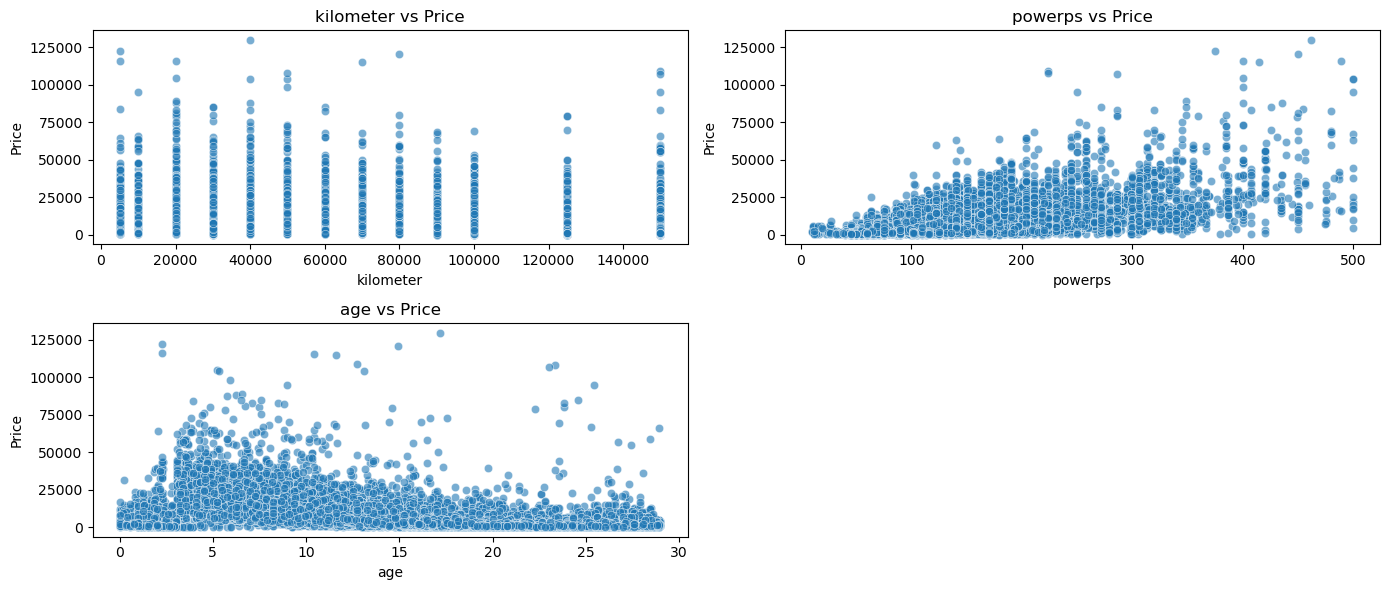

In [92]:
# num - num analysis

numerical_features = ['kilometer', 'powerps', 'age']  # Replace with your actual numerical features
target = 'price'

# Setting up the matplotlib figure
plt.figure(figsize=(14, 6))

# Loop through each numerical feature
for i, num_feature in enumerate(numerical_features):
    plt.subplot(2, len(numerical_features)//2 + 1, i+1)
    # Scatter plot for each numerical feature against 'price'
    sns.scatterplot(data=filtered_data, x=num_feature, y=target, marker='o', alpha=0.6)
    plt.title(f'{num_feature} vs Price')
    plt.xlabel(num_feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [93]:
numerical_features = ['kilometer', 'powerps', 'age']  # Replace with your actual numerical features
target = 'price'
# Calculate the correlation matrix
correlation_matrix = filtered_data[numerical_features + [target]].corr()
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           kilometer  powerps    age  price
kilometer      1.000   -0.021  0.406 -0.454
powerps       -0.021    1.000 -0.160  0.592
age            0.406   -0.160  1.000 -0.469
price         -0.454    0.592 -0.469  1.000


In [ ]:
# Bivariate analysis report

# kilometer increses then price decreases 
# powerps increases then price increases
# age increase then price decreases

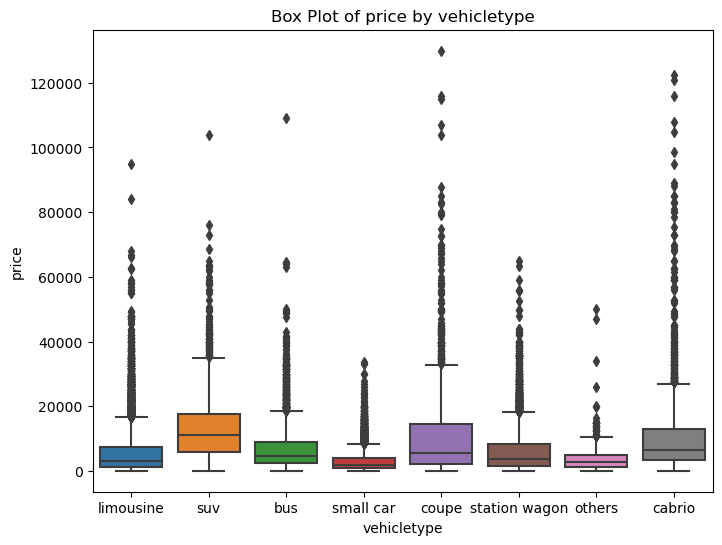

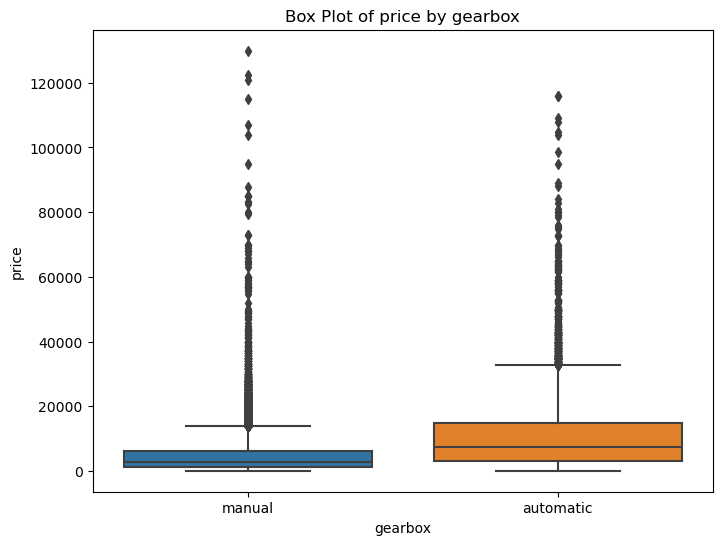

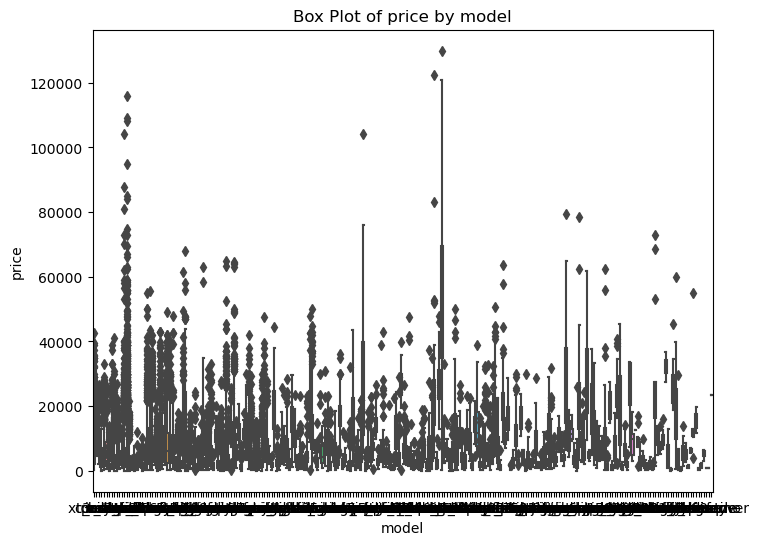

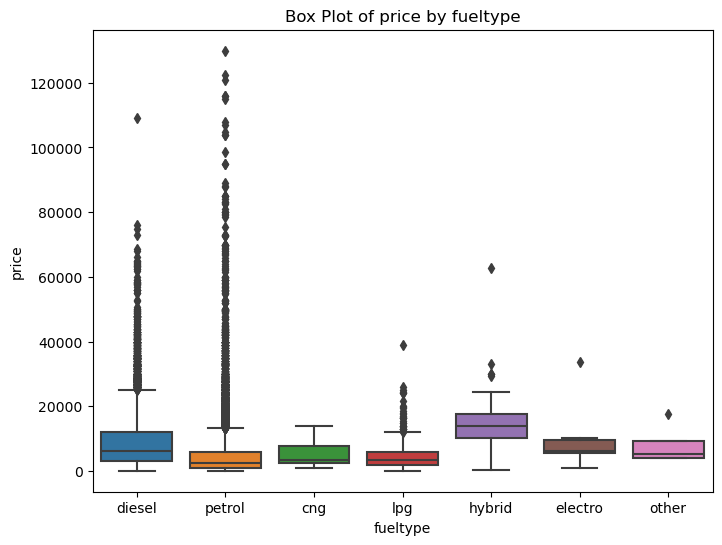

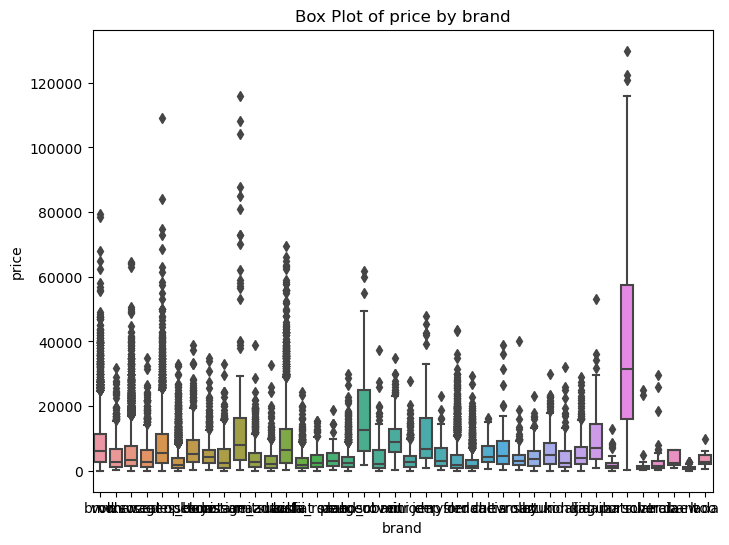

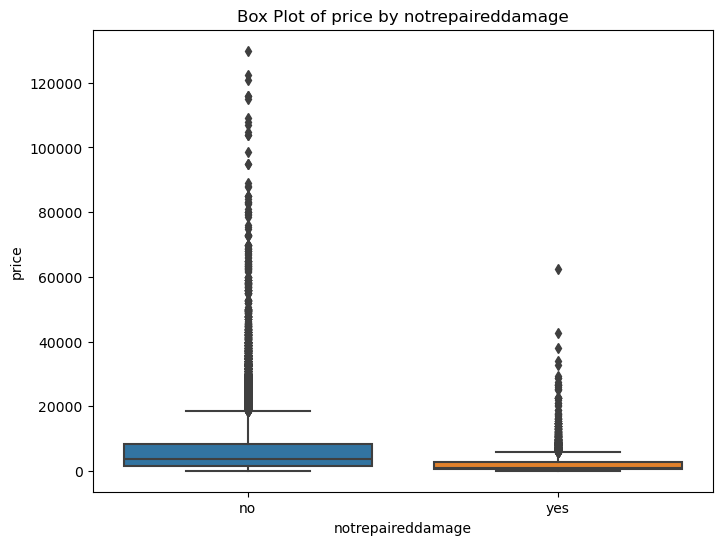

In [97]:
# num - category analysis

numerical_features   = ['price','powerps', 'kilometer', 'age']
categorical_features = ['vehicletype','gearbox', 'model','fueltype','brand','notrepaireddamage']    

for categorical_feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=categorical_feature, y='price', data=filtered_data)
    plt.title(f'Box Plot of price by {categorical_feature}')
    plt.show()

In [103]:
# summary statistics
for categorical_feature in categorical_features:
    print(filtered_data.groupby(categorical_feature)['price'].mean())
    print()
    print("=========================")
    print()

vehicletype
bus              6991.146
cabrio          10170.284
coupe           10369.907
limousine        5566.432
others           4368.595
small car        2957.996
station wagon    6059.858
suv             13328.633
Name: price, dtype: float64


gearbox
automatic   10683.238
manual       4757.714
Name: price, dtype: float64


model
80         1382.745
90         2561.133
100        1502.436
145         481.250
147        2608.276
             ...   
yaris      3704.137
yeti      14952.593
ypsilon    1806.136
z_reihe   13231.581
zafira     3801.607
Name: price, Length: 244, dtype: float64


fueltype
cng        5146.686
diesel     8877.229
electro    9138.700
hybrid    15892.694
lpg        4596.399
other      7987.500
petrol     4809.253
Name: price, dtype: float64


brand
alfa_romeo        3648.528
audi              9271.341
bmw               8526.572
chevrolet         6264.382
chrysler          4702.192
citroen           3693.710
dacia             5411.618
daewoo            1106.94

In [ ]:
# report 
# median price of suv is greater than other vehicle types
# gearbox automatic type median value is greater than the manual type
# fueltype median price of hybrid is greater than other fueltypes

# Feature engineering

In [109]:
fil_data = filtered_data.copy()

In [111]:
# powerps , kilometer , age , price
fil_data.head()

,price,vehicletype,gearbox,powerps,model,kilometer,fueltype,brand,notrepaireddamage,age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,no,15.250
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,no,15.920
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920


In [ ]:
# numerical feature analysis

# price is right skewed
# powerps is nearly skewed
# Kilometer is left skewed
# age is nearly normaly distributed 

In [134]:
print(fil_data['powerps'].skew())
print(fil_data['kilometer'].skew())
print(fil_data['age'].skew())

1.555717748269969
-1.5246998972004666
-0.18669346321726524


In [135]:
print(fil_data['log_powerps'].skew())
print(fil_data['log_kilometer'].skew())
print(fil_data['log_age'].skew())

0.08822516054383642
-3.09846758402334
-1.7213112854041384


In [137]:
fil_data['kilometer_sqrt'].skew()

-2.0048383545324335

In [140]:
fil_data['kilometer_boxcox'].skew()

-0.9780036212870099

In [144]:
fil_data['kilometer_yeojohnson'].skew()

-0.9780035722646188

In [121]:
# data is transformed 

fil_data['log_powerps'] = np.log1p(filtered_data['powerps'])
fil_data['log_kilometer'] = np.log1p(filtered_data['kilometer'])
fil_data['log_age'] = np.log1p(filtered_data['age'])

In [136]:
# kilometer feature transformation
fil_data['kilometer_sqrt'] = np.sqrt(fil_data['kilometer'])
fil_data['kilometer_boxcox'], _ = boxcox(fil_data['kilometer'] + 1)  # adding 1 to handle zeros
fil_data['kilometer_yeojohnson'], _ = yeojohnson(fil_data['kilometer'])

In [150]:
# for age feature 
print(fil_data['age'].skew())
print(fil_data['log_age'].skew())
print(fil_data['age_sqrt'].skew())

fil_data['age_sqrt'] = np.sqrt(fil_data['age'])

-0.18669346321726524
-1.7213112854041384
-0.9708538919797658


In [152]:
fil_data.head()

,price,vehicletype,gearbox,powerps,model,kilometer,fueltype,brand,notrepaireddamage,age,log_powerps,log_kilometer,log_age,kilometer_sqrt,kilometer_boxcox,kilometer_yeojohnson,age_sqrt
0,4450,limousine,manual,150,3er,150000,diesel,bmw,no,15.250,5.017,11.918,2.788,387.298,75587104198360.109,75587387836432.484,3.905
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500,5.100,11.918,2.674,387.298,75587104198360.109,75587387836432.484,3.674
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,no,15.920,4.625,11.918,2.828,387.298,75587104198360.109,75587387836432.484,3.990
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000,4.466,11.002,2.639,244.949,5991038174959.097,5991058873729.399,3.606
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920,5.226,11.918,2.478,387.298,75587104198360.109,75587387836432.484,3.305


In [ ]:
# for powerps use log
# for kilometer use boxcox
# for age remain as it is 

In [153]:
fil_data.drop(columns=['log_kilometer', 'log_age', 'kilometer_sqrt','kilometer_yeojohnson','age_sqrt'], inplace=True)

In [167]:
fil_data.head()

,price,vehicletype,gearbox,model,fueltype,brand,notrepaireddamage,log_powerps,kilometer_boxcox,age
0,4450,limousine,manual,3er,diesel,bmw,no,5.017,75587104198360.109,15.250
1,13299,suv,manual,xc_reihe,diesel,volvo,no,5.100,75587104198360.109,13.500
2,3200,bus,manual,touran,diesel,volkswagen,no,4.625,75587104198360.109,15.920
3,4500,small car,manual,ibiza,petrol,seat,no,4.466,5991038174959.097,13.000
4,18750,suv,automatic,xc_reihe,diesel,volvo,no,5.226,75587104198360.109,10.920


In [ ]:
# vehicletype	gearbox	model	fueltype	brand	notrepaireddamage 

In [168]:
# List of categorical features
categorical_features = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaireddamage']

# Loop through each categorical feature
for feature in categorical_features:
    print(f"Unique value counts for {feature}:")
    print(filtered_data[feature].value_counts())
    print("\n")

Unique value counts for vehicletype:
vehicletype
limousine        14143
small car         9142
station wagon     7965
bus               3519
cabrio            2624
coupe             2086
suv               1744
others             296
Name: count, dtype: int64


Unique value counts for gearbox:
gearbox
manual       32413
automatic     9106
Name: count, dtype: int64


Unique value counts for model:
model
golf          4158
others        3301
3er           2413
polo          1485
corsa         1376
              ... 
kalina           2
b_max            1
elefantino       1
charade          1
rangerover       1
Name: count, Length: 244, dtype: int64


Unique value counts for fueltype:
fueltype
petrol     28062
diesel     12656
lpg          681
cng           70
hybrid        36
electro       10
other          4
Name: count, dtype: int64


Unique value counts for brand:
brand
volkswagen        8839
bmw               4746
opel              4404
mercedes_benz     3941
audi              3907
for

In [212]:
# Encoding starts

In [205]:
# One-Hot Encoding for 'vehicletype'
vehicletype_encoded = pd.get_dummies(fil_data['vehicletype'], prefix='vehicletype', drop_first=True, dtype = int)
fil_data = pd.concat([fil_data, vehicletype_encoded], axis=1)
fil_data.drop('vehicletype', axis=1, inplace=True)

In [192]:
# Label Encoding for 'gearbox'
fil_data['gearbox'] = fil_data['gearbox'].map({'manual': 0, 'automatic': 1})

In [207]:
# One-Hot Encoding for 'fueltype'
fueltype_encoded = pd.get_dummies(fil_data['fueltype'], prefix='fueltype', drop_first=True, dtype = int)
fil_data = pd.concat([fil_data, fueltype_encoded], axis=1)
fil_data.drop('fueltype', axis=1, inplace=True)

In [209]:
# Label Encoding for 'notrepaireddamage'
fil_data['notrepaireddamage'] = fil_data['notrepaireddamage'].map({'yes': 1, 'no': 0})

In [217]:
# One-Hot Encoding for 'brand'
brand_encoded = pd.get_dummies(fil_data['brand'], prefix='brand', drop_first=True, dtype = int)
fil_data = pd.concat([fil_data, brand_encoded], axis=1)
fil_data.drop('brand', axis=1, inplace=True)

In [225]:
# Group models appearing less than 50 times into 'Other'
threshold = 20
model_counts = fil_data['model'].value_counts()
rare_models = model_counts[model_counts < threshold].index
fil_data['model'] = fil_data['model'].apply(lambda x: 'Other' if x in rare_models else x)

# One-hot encode the 'model' column
model_dummies = pd.get_dummies(fil_data['model'], prefix='model', dtype = int)
fil_data = pd.concat([fil_data, model_dummies], axis=1)
fil_data.drop('model', axis=1, inplace=True)  # Drop the original categorical column

# Model Building

In [258]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [253]:
# Split the data into training and testing sets
X = fil_data.drop('price', axis=1)  # Features
y = fil_data['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [255]:
# Initialize and train the model
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [256]:
# Predict and evaluate
y_pred = model_lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R^2: {r2}")

Linear Regression MSE: 18864925.929840904
Linear Regression R^2: 0.7008016271488582


In [275]:
# Decision tree
# Splitting the dataset
X = fil_data.drop('price', axis=1)  # Features
y = fil_data['price']  # Target variable
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [276]:
# Feature Scaling - only fit on training data, transform both train and test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [277]:
# Model initialization
model_dt = DecisionTreeRegressor(random_state=42)

In [278]:
# Fit the model
model_dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [279]:
# Predictions
y_pred = model_dt.predict(X_test_scaled)

In [280]:
# Performance evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Decision Tree Regression MSE: {mse}")
print(f"Decision Tree Regression R^2: {r2}")

Decision Tree Regression MSE: 15670933.680074487
Decision Tree Regression R^2: 0.7514584538749904


In [281]:
# Step 5: Cross-validation
cv_scores_dt = cross_val_score(model_dt, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-validation R^2 scores for Decision Tree: {cv_scores_dt}")
print(f"Mean Cross-validation R^2 for Decision Tree: {cv_scores_dt.mean()}")

Cross-validation R^2 scores for Decision Tree: [0.69280209 0.74594697 0.75772246 0.7154885  0.73482852]
Mean Cross-validation R^2 for Decision Tree: 0.729357707135257


In [ ]:
# Random forest

In [287]:
# Splitting the dataset
X = fil_data.drop('price', axis=1)  # Features
y = fil_data['price']  # Target variable

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [288]:
# Feature Scaling - only fit on training data, transform both train and test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [289]:
# Model initialization
model_rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)

# Fit the model
model_rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [290]:
# Predictions
y_pred = model_rf.predict(X_test_scaled)

In [291]:
# Performance evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regression MSE: {mse}")
print(f"Random Forest Regression R^2: {r2}")

Random Forest Regression MSE: 8688716.548530184
Random Forest Regression R^2: 0.8621966572700482


In [292]:
# Step 5: Cross-validation
cv_scores_rf = cross_val_score(model_rf, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-validation R^2 scores for Random Forest: {cv_scores_rf}")
print(f"Mean Cross-validation R^2 for Random Forest: {cv_scores_rf.mean()}")

Cross-validation R^2 scores for Random Forest: [0.83285496 0.82609647 0.84244445 0.8387153  0.84670559]
Mean Cross-validation R^2 for Random Forest: 0.8373633543090092
